# Analisando as notas em Geral

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/carlosvinicius-ai/DataScience/master/BasesDeDados/movies/ratings.csv"
notas = pd.read_csv(url)


In [3]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
notas.shape

(100836, 4)

In [5]:
notas.columns = ['UsuarioID', 'FilmeID', 'Nota', 'Momento']
notas.head()

,UsuarioID,FilmeID,Nota,Momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
notas['Nota'].unique()
# a função unique tras apenas o valor unico, sem repetir

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [7]:
notas['Nota'].value_counts()
# conta quantas vezes cada nota foi dada e quantas vezes ela foi passada

Nota
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [8]:
print('Media:', notas['Nota'].mean())
# passa a média das notas
print('Mediana:', notas.Nota.median())
# passa a mediana

Media: 3.501556983616962
Mediana: 3.5


<Axes: ylabel='Frequency'>

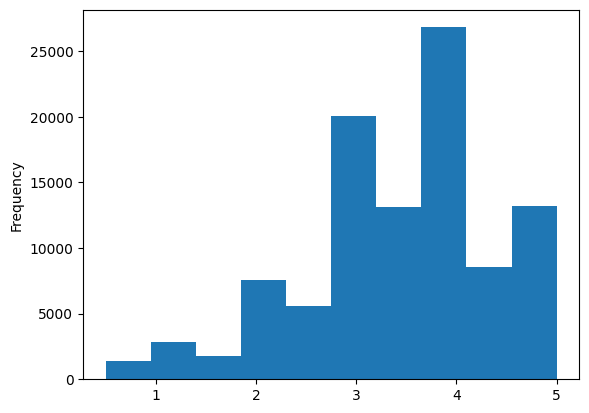

In [9]:
notas.Nota.plot(kind='hist')

In [10]:
notas.Nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: Nota, dtype: float64

<Axes: >

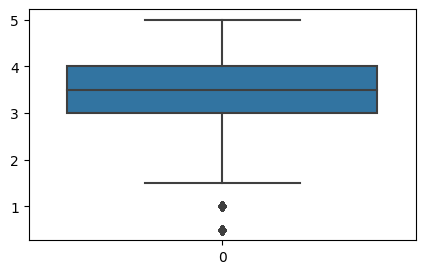

In [11]:
plt.figure(figsize=(5,3))
sns.boxplot(notas.Nota)

# plt.figure serve para dar um tamanho a Figura

# Olhando Filmes

In [12]:
filmes_url = "https://raw.githubusercontent.com/carlosvinicius-ai/DataScience/master/BasesDeDados/movies/movies.csv"
filmes = pd.read_csv(filmes_url)
filmes.columns = (['filmeID', 'titulo', 'genero'])
filmes.head()

,filmeID,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [13]:
notas.head()

,UsuarioID,FilmeID,Nota,Momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# Analisando notas especificas por filme

In [14]:
notas.query("FilmeID==1").Nota.mean()
#Query serve para busca

3.9209302325581397

In [15]:
medias_por_filme = notas.groupby("FilmeID").mean().Nota
medias_por_filme.head()
#groupby serve para agrupar o dataframe

FilmeID
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: Nota, dtype: float64

<Axes: ylabel='Frequency'>

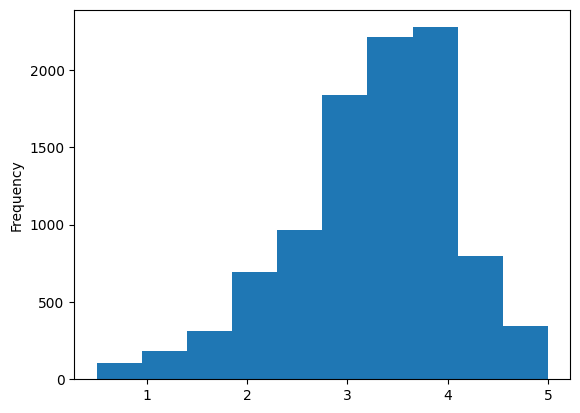

In [16]:
medias_por_filme.plot(kind='hist')

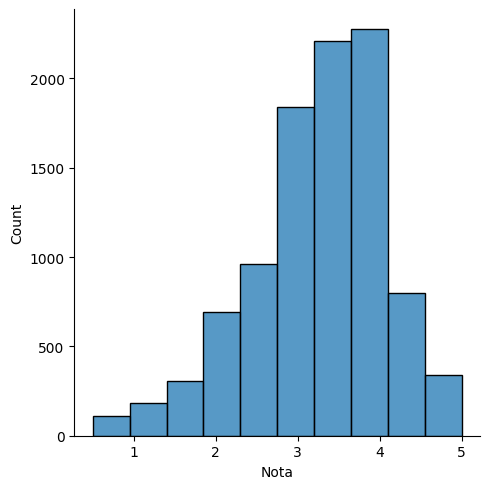

In [17]:
sns.displot(medias_por_filme, bins=10)

#bins é para colocar quantas colunas eu quero

# matplotlib

Text(0.5, 1.0, 'Histograma da média de notas por titulo')

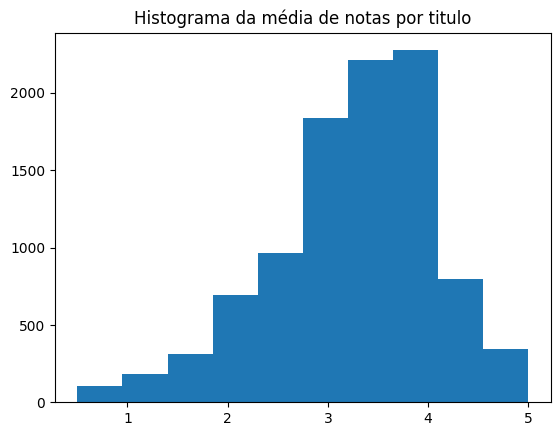

In [18]:
plt.hist(medias_por_filme)
plt.title('Histograma da média de notas por titulo')

# title é utilizado para colocar um titulo ao gráfico

# TMDB 5000

In [19]:
tmdb_5000 = 'https://raw.githubusercontent.com/carlosvinicius-ai/DataScience/master/BasesDeDados/TMDB/tmdb_5000_movies.csv'

tmdb = pd.read_csv(tmdb_5000)

tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [20]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [5]:
tmdb.vote_average.unique()

array([ 7.2,  6.9,  6.3,  7.6,  6.1,  5.9,  7.4,  7.3,  5.7,  5.4,  7. ,
        6.5,  6.4,  6.2,  7.1,  5.8,  6.6,  7.5,  5.5,  6.7,  6.8,  6. ,
        5.1,  7.8,  5.6,  5.2,  8.2,  7.7,  5.3,  8. ,  4.8,  4.9,  7.9,
        8.1,  4.7,  5. ,  4.2,  4.4,  4.1,  3.7,  3.6,  3. ,  3.9,  4.3,
        4.5,  3.4,  4.6,  8.3,  3.5,  4. ,  2.3,  3.2,  0. ,  3.8,  2.9,
        8.5,  1.9,  3.1,  3.3,  2.2,  0.5,  9.3,  8.4,  2.7, 10. ,  1. ,
        2. ,  2.8,  9.5,  2.6,  2.4])

In [24]:
contagem_de_lingua = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_lingua.columns= ['original_language', 'total']
contagem_de_lingua.head()

# values_counts é para contar quantas vezes cada index repete
# to_frame serve para transformar em dataframe
# reset_index é para alterar o index

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<Axes: xlabel='original_language', ylabel='total'>

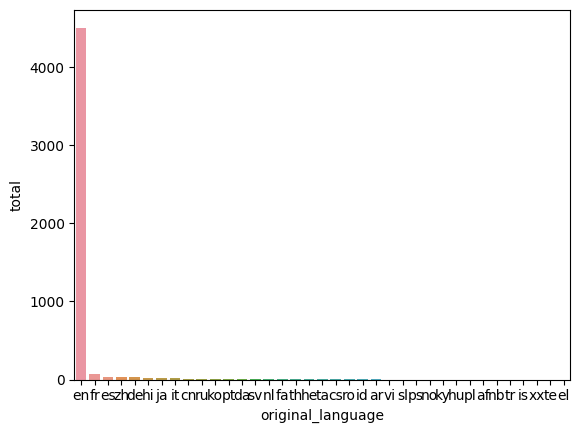

In [25]:
sns.barplot(x ='original_language', y='total', data = contagem_de_lingua)

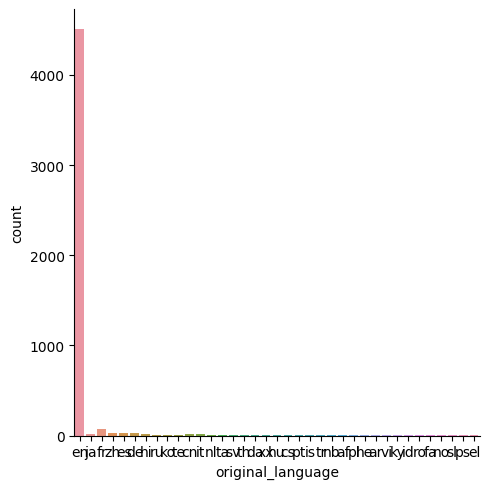

In [40]:
sns.catplot(x='original_language', kind='count', data= tmdb)

# x = os dados que vão ser puxado
#kind = o que fazer com os dados, neste caso contar
# data = a base de dados que será utilizado

([<matplotlib.patches.Wedge at 0x1a5482002b0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text(

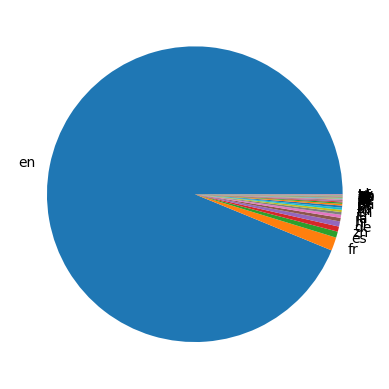

In [27]:
plt.pie(contagem_de_lingua["total"], labels = contagem_de_lingua["original_language"])

# grafico de pizza

In [30]:
total_por_lingua = tmdb.original_language.value_counts()
total_geral = total_por_lingua.sum()
total_em_ingles = total_por_lingua.loc['en']
total_resto = total_geral - total_em_ingles
print(total_em_ingles, total_resto)

4505 298


<Axes: xlabel='lingua', ylabel='total'>

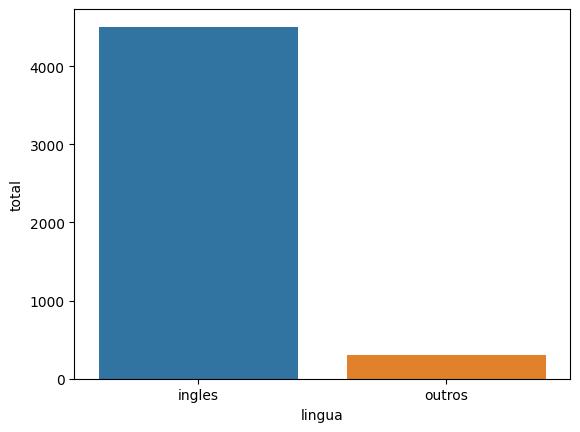

In [35]:
dados = {
    'lingua' : ['ingles', 'outros'],
    'total' : [total_em_ingles, total_resto]
}
dados = pd.DataFrame(dados)
sns.barplot(x='lingua', y='total', data = dados)
#DataFrame serve para mostrar os dados em dataframe

In [37]:
total_linguas_outros_filmes = tmdb.query('original_language != "en"').original_language.value_counts()
total_linguas_outros_filmes

#visualizando as linguas diferentes do ingles

original_language
fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: count, dtype: int64

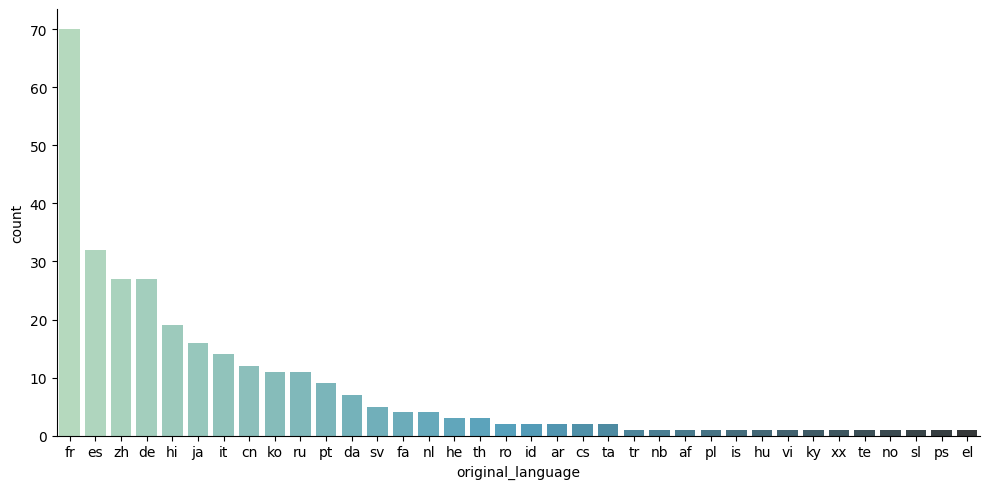

In [48]:
filmes_sem_lingua_original_em_ingles = tmdb.query('original_language != "en"')
sns.catplot(x = 'original_language', kind = 'count', 
            data = filmes_sem_lingua_original_em_ingles, 
            aspect=2, 
            palette = "GnBu_d",
            order=total_linguas_outros_filmes.index)

#aspect no catplot serve para mudar a formataçao
#order você passa a ordem para ele como quer apresentar os dados